# Microgrid Optimization 

## *Introduction*
This section gives a brief primer on microgrids and the motivation for this project. 
### What is a Microgrid?
A *microgrid* is defined to be a decentralized group of electricity sources and loads that have the ability to both connect and disconnect to a larger, conventional grid. Think generators, solar panels, batteries, EV's, etc. You can think of the aggregation of these devices as a reliable backup source of power for your home in the event of a blackout— something that unfortunately has been quite relevant in recent <a href="https://www.nytimes.com/2021/02/20/climate/united-states-infrastructure-storms.html" target="a problem">news</a>. 

<img src="https://volttron.org/sites/default/files/styles/colorbox_node_image/public/icon/export_DER.png?itok=kN9ZR3Jb" width="400" height="400" />

But you can even think of a microgrid as a money-saving (and also money-making, as we'll see later) investment. Solar panels convert abundant electromagnetic radiation from the sun to create electricity. So when the sun is shining, one can save money by eliminating the need to purchase energy from the grid. Now if you adds in a battery to the system, things get more interesting. 

### The Battery is a Fridge for Electrons
Think of a battery as a refrigerator. Say one evening you're super hungry and you decide to order Thai takeout. You kill the chicken pad thai and cocunut curry, but for whatever reason you still got a good amount of fried rice left over. If you hate wasting food like me, then it would be a shame to throw away such good fried rice. 

In comes the fridge. Rather than throwing out some good food, the fridge can store it until I want it again, which would likely be at 12 AM on a Friday night. The fridge, just like a battery, gives you the ability to store energy until the user decides to consume it later. In the case of the fridge, this energy is in the carb-heavy grains of fried rice, while in the case of a battery, this energy is in the electrons that carry electricity. 

Just like how one can order too much takeout, a solar panel can produce excess electricity when its generation is greater than the load. Rather than letting that excess energy go to waste, a battery can store the electricity "leftovers", which can be used for a another time (say, when everyone is cranking up the AC). As a side note, excess "leftovers" of solar energy is actually a <a href="https://www.greentechmedia.com/articles/read/an-illustrated-guide-to-solar-curtailment-in-california" target="a problem">problem</a> for today's grid, and is the reason why storage and transmission is important for high renewable penetration. 

### Revenue Generation
But a battery can be more than an electron fridge. It can also be a money machine. As alluded to earlier, one aspect of a microgrid is its ability to generate revenue. How does it do this? By participating in the electricity market: in addition to buying energy from the grid, one can also sell it through Net Energy Metering (NEM). It turns out that electricity prices change throughout the day, either based on a certain time schedule or real-time market-based dynamics. Both cases follow more or less the same principle: when demand for electricity is high, the rate is high. As an example, you can expect the electricity price to be quite high on a summmer afternoon compared to the early morning. 

Given this information, one might be able to come up with a simple strategy based on arbitrage: charge your battery when electricity is cheap at night and sell it back to the grid in the afternoon when it's more expensive! Think of it like stocks: buy low, sell high. 

### The Need for an Algorithm 
So our microgrid consists of just a battery, and we have a simple strategy for electricity: buy low and sell high. But the devil is in the details: exactly how much do we buy, how much do we sell, and at what time do we execute? Our problem also has to consider the fact that our house has its own energy demands that fluctuate throughout the day that could be supplied by the electricity from the battery. 

If we include a PV system, things get more complicated. With solar energy, we have to deal with another set of questions: Do we use it charge the battery, use it to power our home, sell it back to the grid, or some combination of everything? If the latter, what are the proportions of each action? Additionally, energy demand and solar output isn't something we know exactly ahead of time. Some days are cloudier than others and some days I'll blast the oven to 500 degrees to cook 50 pizzas for no good reason. The point is, our energy demand and solar output are uncertain quantities, and we have to forecast these things to an acceptable degree of accuracy to make a good decision. 

Last but not least, we want automation. Ideally, the microgrid will be able to take in all the information above and calculate a set of optimal actions that can make us money without human interference. We need an algorithm that could solve this problem.

### The Solution: Model Predictive Control (MPC)
I propose a solution to the above microgrid problem: Model Predictive Control (MPC). It's a popular mathematical method that has been used in optimizing industrial/chemical processes, and lends itself quite well to energy management systems like this one. 

Assuming that we know our energy demand and solar output ahead of time, the above microgrid problem can be solved using convex optimization. Quite simply, we can formulate the problem mathematically and input it into a software solver that spits out an optimal solution to the problem. That is, our optimal solution is a set of actions that we take for each timestep that maximizes our revenue. 

However, the energy demand or load and solar output is NOT known ahead of time. As mentioned earlier, these are quantities that we generally have to forecast. MPC provides a simple framework for solving an optimization problem that takes into account forecast uncertainties. There are three steps in this algorithm. At each timestep *t*: 
1. *Forecast*: Make forecasts of unknown quantities relevant to the problem future periods *t+1,t+2,...,t+T-1* 
2. *Optimize*: Solve the optimization problem assuming the above quantities to obtain a solution for time periods *t+1,t+2,...,t+T-1*.
3. *Execute*: Implement the first action of the obtained solution set. 

Repeat this procedure, incorporating updated information, at time *t+1*. As you can see, MPC simply solves a series of optimization problems that incorporate forecasts made at a specific timestep. 

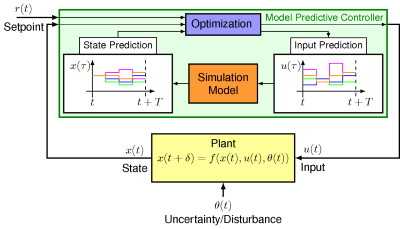

*In this project, I design and validate a MPC algorithm for optimal microgrid operation in a custom-built simulation environment. Modeling is based on real-life solar data and load profile of a typical household. As part of implementing the MPC algorithm, I use machine learning methods for time-series forecasting energy demand and PV generation.* 

## *Methodology*
### Dataset 
I used real life datasets for four components of this project: 
1. Load Profile 
2. PV Generation 
3. Electricity Rates 
4. Device Specs

For the load profile of a sample home, I used the <a href="http://www.ercot.com/mktinfo/loadprofile/alp/">historical load profile dataset</a> given by ERCOT. In this dataset, the load profiles for various weather zones and types (i.e. residential, industrial, winter-heavy, etc.) is given in 15-minute kWh values. I used data from the years 2014-2020 for the 'RESLOWR_EAST' profile, indicating a residential home in the east coast. 2020 was the validation set, while 2014-2020 was the training set for the forecasting model.

For the PV output, I used historical PV irradiation time-series datasets for a given geographic location on the east coast from <a href="https://solcast.com/"> Solcast</a>. The dataset gives horizontal irradiance, global irradiance, and other interesting parameters in 15-minute intervals from 2006-2020. Just like before, 2020 was the validation set while the other years were used for training data for the solar generation forecasting model. 

Electricity rates are based off of <a href="https://www.pge.com/en_US/residential/rate-plans/rate-plan-options/electric-vehicle-base-plan/electric-vehicle-base-plan.page"> PG&E's Time-of-Use </a> for EV plan, given by: 
<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_1226/https://www.kw-engineering.com/wp-content/uploads/2018/12/pge-ev-rate-schedule-peak-periods-residential-charging-reduce-costs-kw-engineering-energy-audit-consultants.png"/> 

Finally, the microgrid device specs were based off of real world examples:

| Parameter      | Value |
| :----------- | :-----------: |
| PV Capacity      | 2.5 kW      |
| Battery Capacity   |  <a href="https://www.tesla.com/powerwall"> 13.5 kWh </a>        |
| Battery Max Charge Rate   | <a href="https://www.tesla.com/powerwall"> 5 kW </a>         |
| Battery Max Disharge Rate   |<a href="https://www.tesla.com/powerwall"> 5 kW </a>       |

### Baseline: Prescient Optimization 
Before we build out our MPC algorithm, we need to have some sort of baseline to compare results with. For the baseline, I consider "prescient" microgrid optimization: we solve the convex optimization problem KNOWING our exact load and PV generation for each timestep ahead of time. This is obviously impossible in real-life, but it should serve as a good reference point for the upper bound of what the MPC algorithm can accomplish. Special shoutout to Stanford's <a href="https://web.stanford.edu/class/ee364a/"> EE364A </a> class which inspired this formulation.

So how do we formulate this microgrid problem mathematically? 

#### Formulation 

First, let's define our variables: 

| Variable      | Description |
| :----------- | :-----------: |
| \\( p^{ld} \\)      | Load Power      |
| \\( p^{grid} \\)     |  Grid Power |
| \\( p^{batt} \\)    | Battery Power    |
| \\( p^{pv} \\)    | PV Power   |
| \\( p^{buy} \\)    | Power Bought from Grid   |
| \\( p^{sell} \\)    | Power Sold to Grid   |
| \\( R^{buy} \\)    | Electricity Buy Rate   |
| \\( R^{sell} \\)    | Electricity Sell Rate   |
| \\( Q \\)    | Battery Capacity   |
| \\( q \\)    | Battery Energy   |
| \\( C \\)    | Battery Max Charge Rate   |
| \\( D \\)    | Battery Max Discharge Rate   |

The objective function is the function that describes what we are trying to minimize. In this case, we are trying to minimize the net costs of the energy we pay. Conversely, you can think of this as maximizing the net revenue. This can be described as:


***
$$\textrm{min} \frac{1}{4}((R^{buy})^Tp^{buy} - (R^{sell})^Tp^{sell})) $$
***

Now we define our constraints: 

***
1.&emsp;Power Balance:<br>
    $$\displaystyle p^{ld}=p^{grid}+p^{batt}+p^{pv}$$
2.&emsp;Battery Energy Limits:<br>
    $$\displaystyle 0 \leq q \leq Q \mathbf{1}$$
3.&emsp;Battery Discharge:<br>
&emsp;&emsp;For $i = 1,2,...,N$<br>
    $$\displaystyle q_{i+1} = q_{i} - \frac{1}{4}p_{i}^{batt} $$ 
4.&emsp;Battery Discharge Limits:<br>
    $$\displaystyle -C\mathbf{1} \leq p^{batt} \leq D\mathbf{1} $$
5.&emsp;Market-to-Grid Relation:<br>
    $$\displaystyle p^{grid} = p^{buy}-p^{sell}$$ 
6.&emsp;Positivity Constraints:<br>
    $$\displaystyle p^{buy}, p^{sell} \geq 0$$ 
***
7.&emsp;Initial Conditions:<br>
    $$\displaystyle q_{1} = \frac{Q}{2} $$ 
***
Note that we have all of the variable quantities given to us in the problem set-up, except for \\( p^{grid} \\), \\( p^{batt} \\), \\( p^{sell} \\), and \\( p^{buy} \\). I also want to note that the sign convention here: **\\( p^{batt} \\) is positive when it is discharging, and is negative when it is charging. \\( p^{grid} \\) is positive when we buy energy from the grid, and is negative when we sell energy to the grid**.

Through the wonders of optimization, *cvxpy* (the optimization software I use) will calculate at each timestep for us the values of these quantities that give us the maximum revenue. Note that these quantities tell us exactly what to do for the microgrid operation at each timestep, i.e. when and how much to charge, discharge, sell to the grid, and buy from the grid. As mentioned earlier, this is assuming that we know the load and solar output for every timestep ahead. 

#### Setup 
The microgrid was simulated using ERCOT load data and Solcast PV generation data in 15 minute intervals from 1-1-2020T11:45 PM to 11-30-2020T11:30 PM. Device specs and electricity rates given above were coded into the scripts. I implemented the optimization problem using cvxpy, an open-source convex optimization solver in Python.  

#### Results
Here are the results of the simulation, assuming we have prescient knowledge of our load demand and solar PV output:

|  Scenario    | Optimal Electricity Cost to User |
| :-----------: | :-----------: |
| w/o Microgrid     |  \$ 3057.50 |
| w/ Microgrid      |   \$ 596.64    |

You can see that a microgrid in this scenario saves us $ 2460.86.

Let's also take a look at what specifically, our optimization algorithm decides to do with our solar power and battery storage capabilities. Here are two three-day simulations, one from the winter and one from the summer, both extracted from our results. 

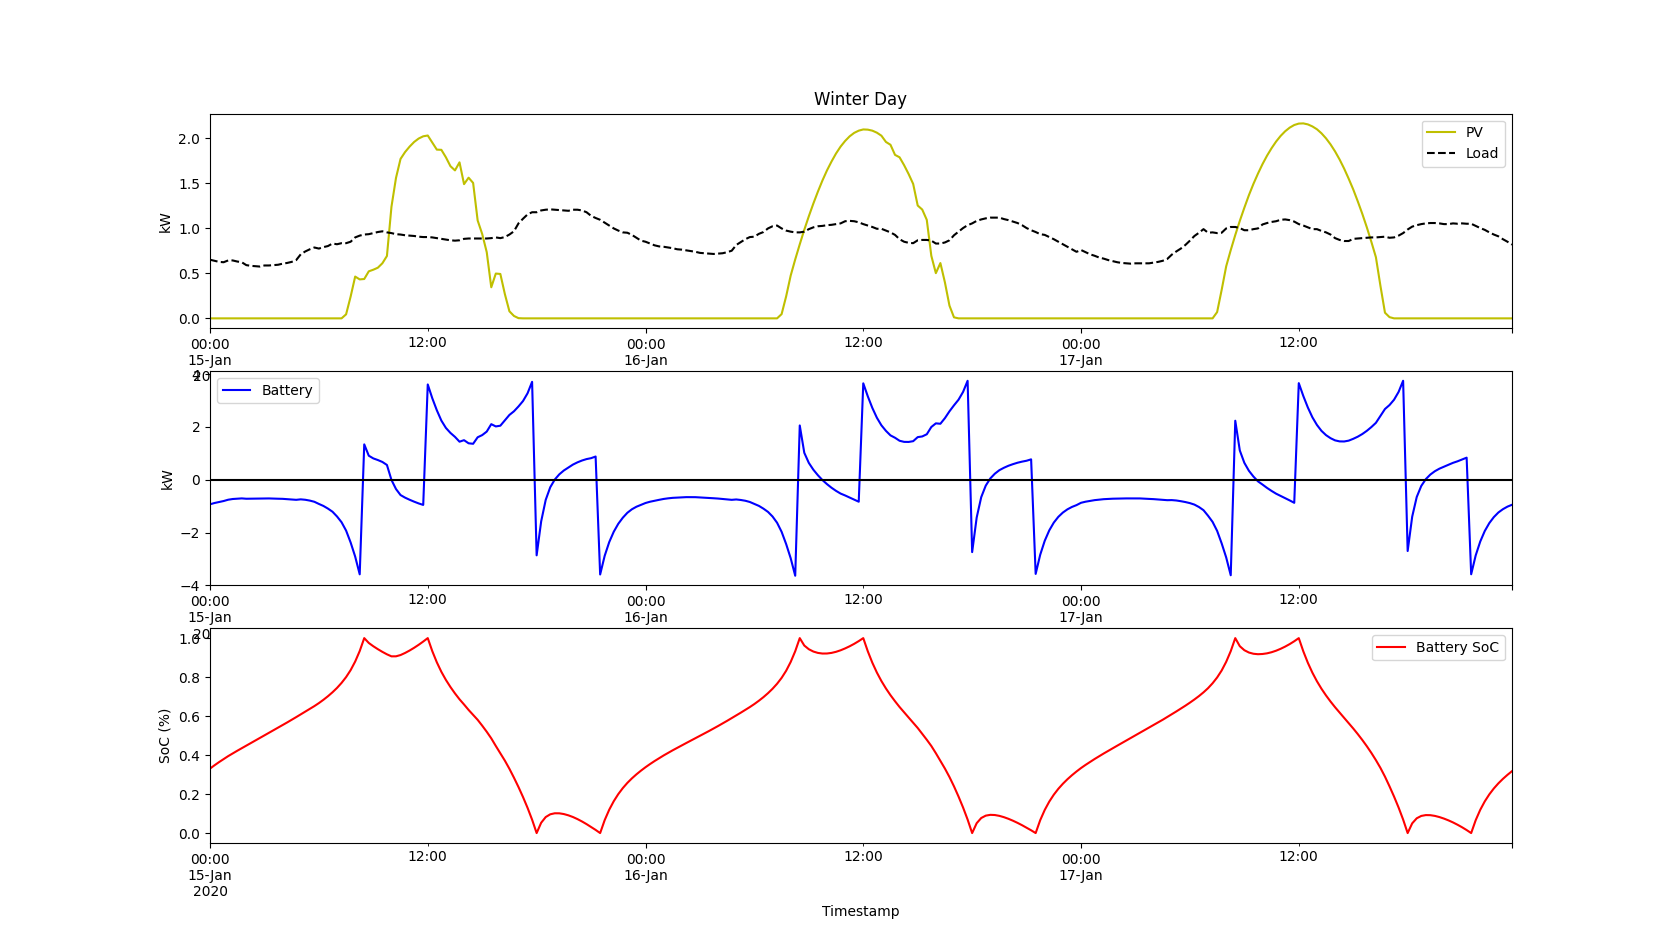

As shown above, you can see that the battery charges at night and in the early morning, and discharges in the early afternoon to provide power to our increased load. The SoC (State-of-Charge) graph in red, describes the % level of energy in the battery thoughout the three day period. For a summer day, shown below, the pattern is quite similar, despite the fact that our load is significantly higher. 

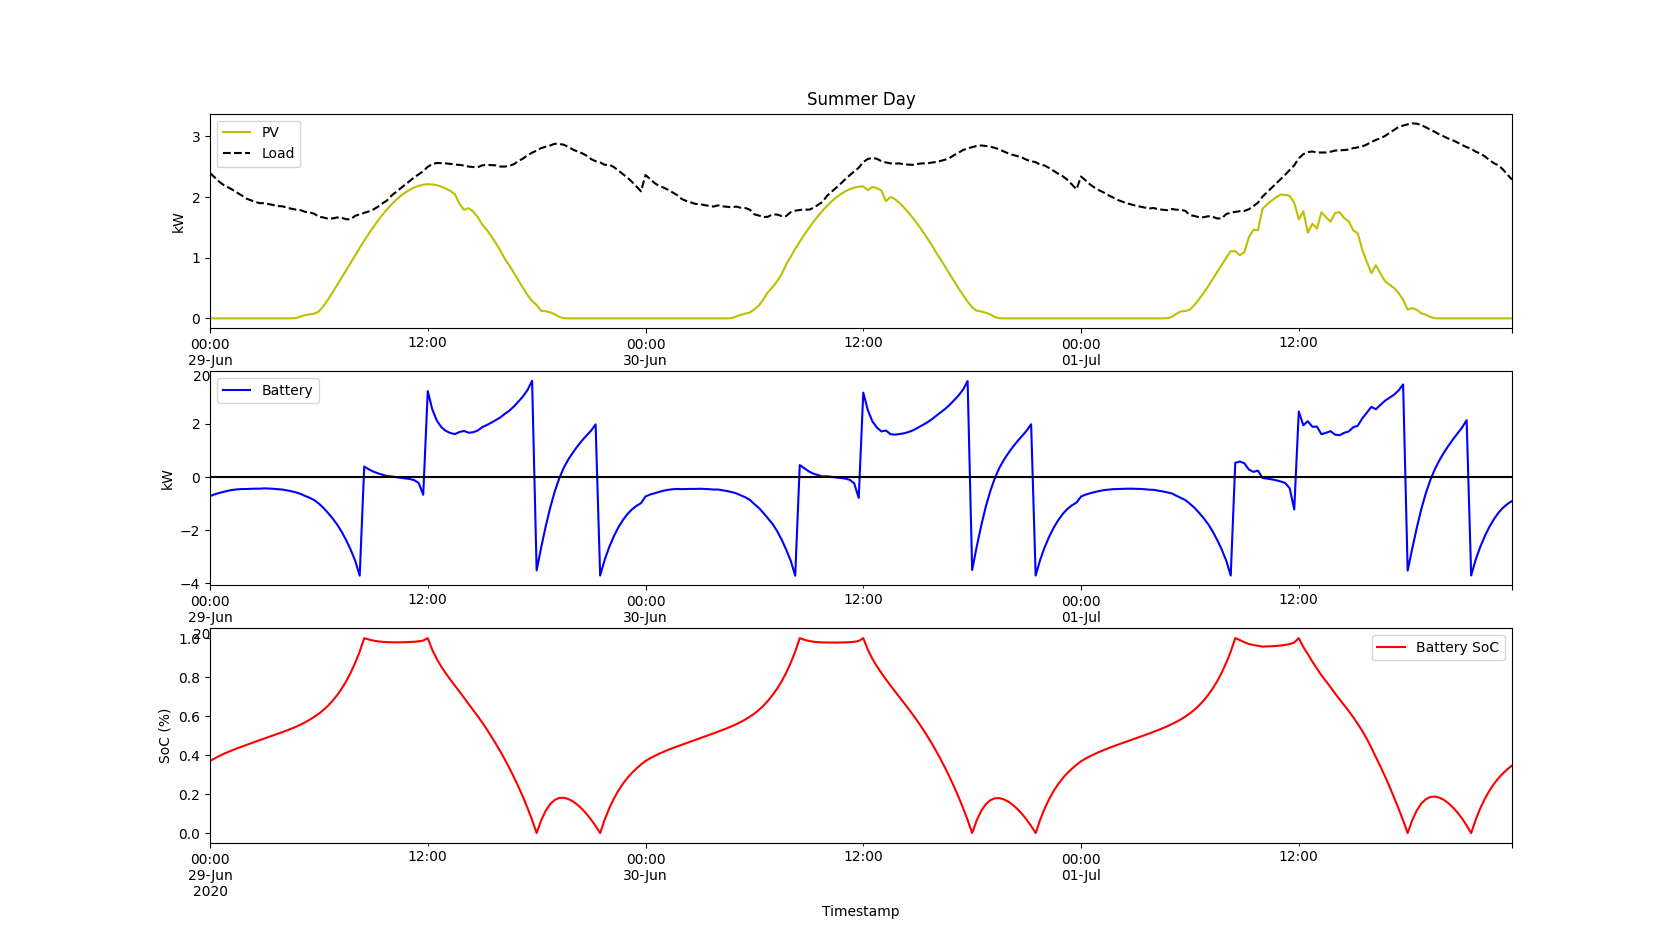

It might be helpful to know the breakdown of our energy usage: in what proportions are our energy sources contributing to the overall generation of electricity for each timestep? The below figure shows this for a sample three-day period in the summer. Note that this energy generation can be used for both powering our load and charging the battery.  

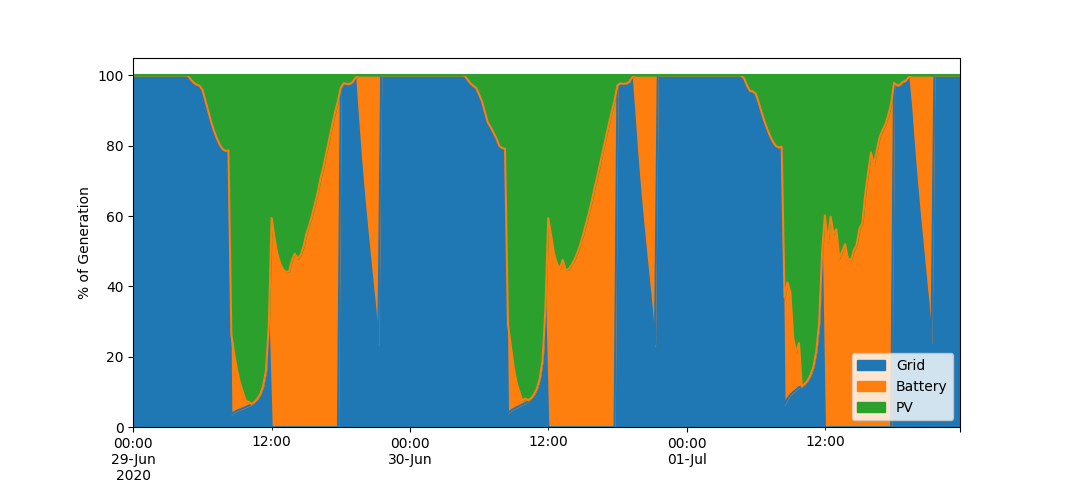

These results are intuitive: we use only electricity from the grid (shown in blue) in the early mornings. As the sun gets brighter, PV generation (shown in green) takes a bigger part of the pie. Between 12 PM and 6 PM, the microgrid is solely powered by the discharging battery (shown in orange) and afternoon sun! There is also a brief spike in battery power generation in the late evening. What does this breakdown look like for a sample period in the winter season?

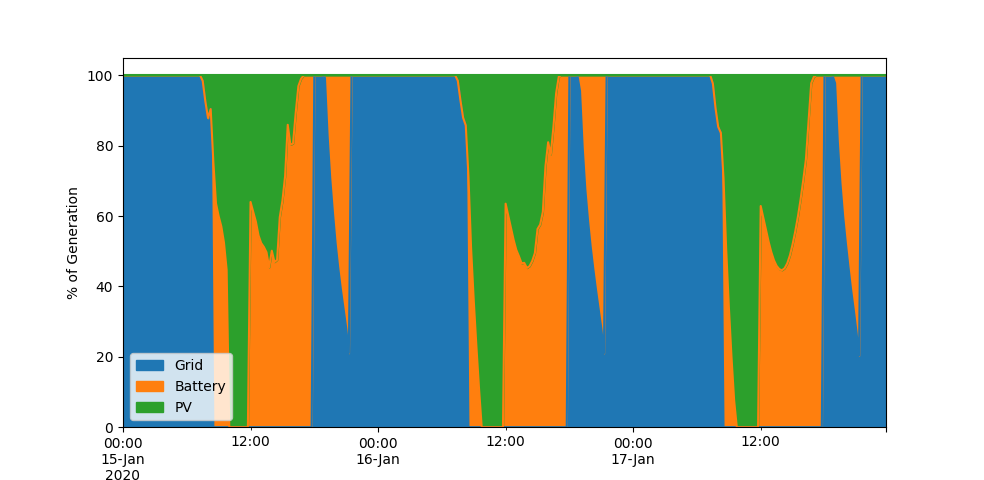

The overall pattern is similar to that of the summer, but we get an interesting insight: our microgrid runs on 100% solar generation briefly right before 12:00 PM! It's also evident that our microgrid can be powered 100% by solar and battery for almost 10 hours straight, between 8:30 AM to 6 PM, to be exact. This can be explained by the fact that our winter load is not as burdensome as our summer load. But regardless, it's impressive that we can do this for a winter day on the microgrid setup that we have.  

### Test: Model Predictive Control 

Ok, so now for the real challenge: how do we implement MPC for this microgrid? There are two parts: 1) developing forecasting methods for predicting PV generation and load profiles, and 2) building the microgrid simulation model to run the MPC algorithm on. 

#### Forecasting Methods 

For predicting future PV generation and load demand based on historical data (described above in the Dataset section), I started with a simple machine learning model: least squares with autoregressive residuals. Both the PV generation and load profiles are periodic, and as such it's baseline function $\hat{b}$ can be described in terms of cosine and sine basis functions:

$$\hat{b}(t) = \beta_{0}+ \sum \limits _{k=1} ^{K} \alpha_{k}\sin \left( \frac{2\pi t}{P_{k}}\right) + \beta_{k}\cos \left( \frac{2\pi t}{P_{k}}\right) $$ 

$P_{k}$ and $K$ describes the harmonics of the functions that dictate the periodicity of the function. For example, based on our observation of the sun and the daily patterns of our energy usage, we would set one of the values of $P_{k}$ to be 24 hours, indicating that we see daily patterns in way the sun shines, energy is used, etc. There may also be weekly and monthly patterns that can be "learned" from the data.

After playing around with these period values, I settled on the following:

|  Type  | Fundamental Periods | Harmonics |
| :-----------: | :-----------: | :-----------:| 
| PV Generation    |  24 hrs, 1 year | 1, 2, 4, 8|
| Load Profile      |   24 hrs, 1 week, 1 year| 1, 2, 4, 8|

I used least squares to fit the above baseline functions with their respective periods and harmonics to historical ERCOT and Solcast data. Basically, I calculated the $\alpha$ and $\beta$ parameters for our ML models. 

The next step was incorporating <a href="https://machinelearningmastery.com/model-residual-errors-correct-time-series-forecasts-python/#:~:text=A%20simple%20and%20effective%20model,at%20the%20next%20time%20step.&text=An%20autoregression%20of%20the%20residual,Moving%20Average%20(MA)%20model.autoregressive"> autoregressive residuals </a> to capture a layer of granularity that the baseline forecast does not have. At a very high level, autoregressive residuals predicts the future error of a baseline based on a weighted sum of errors directly from the past. By predicting the errors, one can just the prediction accordingly to get a more "accurate" prediction.   

Assuming that $r_t$ is the residual (error), $x_t$ is the actual value, and $\hat{b}_{t}$ is the projected baseline value at timestep $t$: 

$$r_t = x_t - \hat{b}_t$$

The predicted residuals can be modeled as a weighted sum of past residuals:

$$\hat{r}_{t+1} = \gamma_{0,0}r_{t} + \gamma_{0,1}r_{t-1} + \gamma_{0,2}r_{t-2} ...\gamma_{0,95}r_{t-95}$$
$$\hat{r}_{t+2} = \gamma_{1,0}r_{t} + \gamma_{1,1}r_{t-1} + \gamma_{1,2}r_{t-2} ...\gamma_{1,95}r_{t-95}$$
$$...$$
$$\hat{r}_{t+96} = \gamma_{95,0}r_{t} + \gamma_{95,1}r_{t-1} + \gamma_{95,2}r_{t-2} ...\gamma_{95,95}r_{t-95}$$

As shown above, I decided to look at the past 96 timestep values to forecast the next 96 values (which equates to 15 minute intervals * 96 periods = 24 hours) when calculating the projected residuals. I fit the residuals to historical data using least squares, and calculated the appropriate $\gamma$ parameters for the load prediction and solar output prediction. Autoregressive residuals allows us to make predictions dependent on recent data, which is not a bad assumption to make if you consider the weather for solar and behavior dynamics for energy demand.

Thus, to make a prediction at time $t$ for time $t+1$, $t+2$, and beyond:

$$ \hat{x} = \hat{b} + \hat{r} $$

The above equation is used for both predicting load and solar output, albeit the specific parameters are different. I call these two machine learning models *Loadcast* and *Solcast*: forecasting load and solar values. 

After training the models on pre-2020 datasets, I validated them against the 2020 dataset. Here are sample results shown below. 

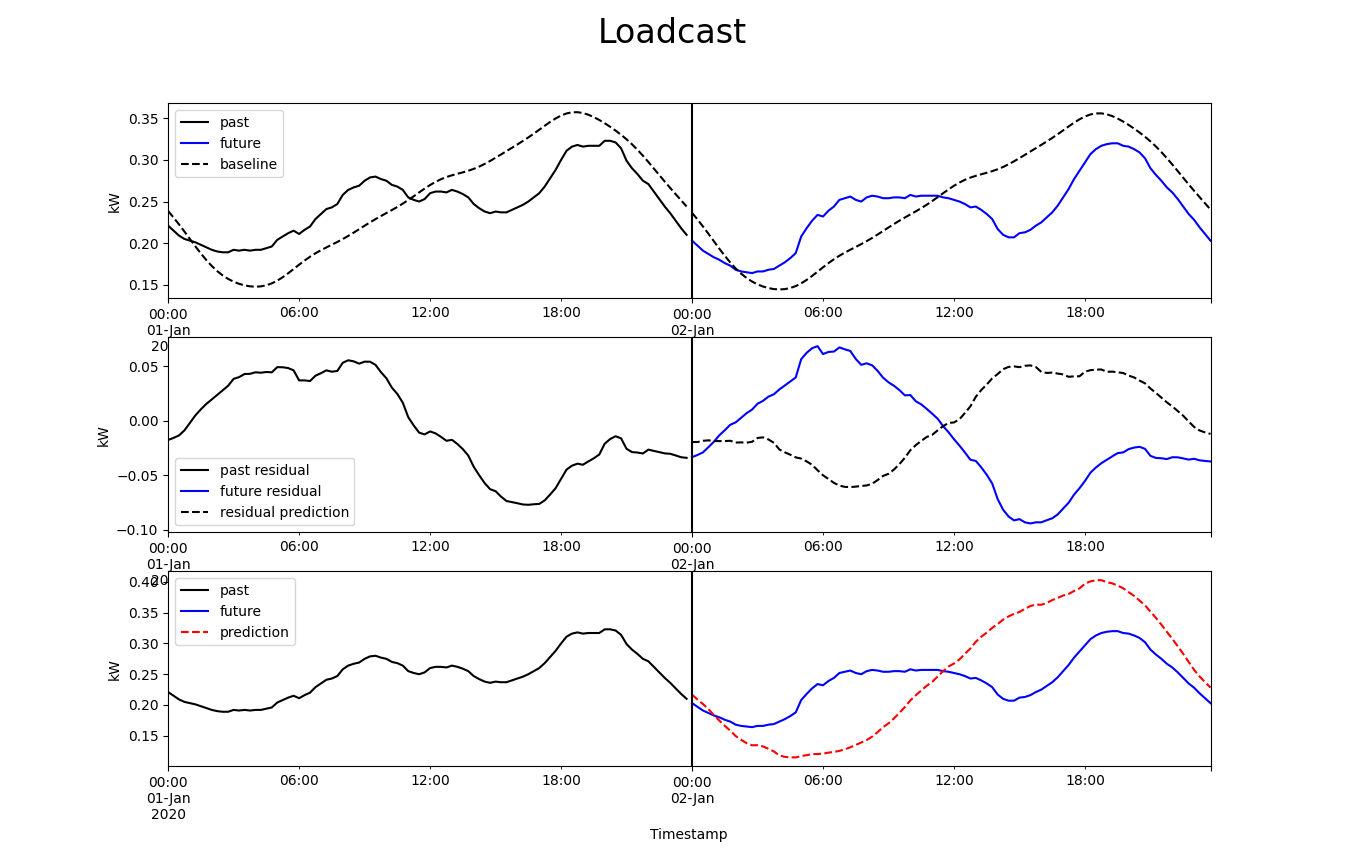

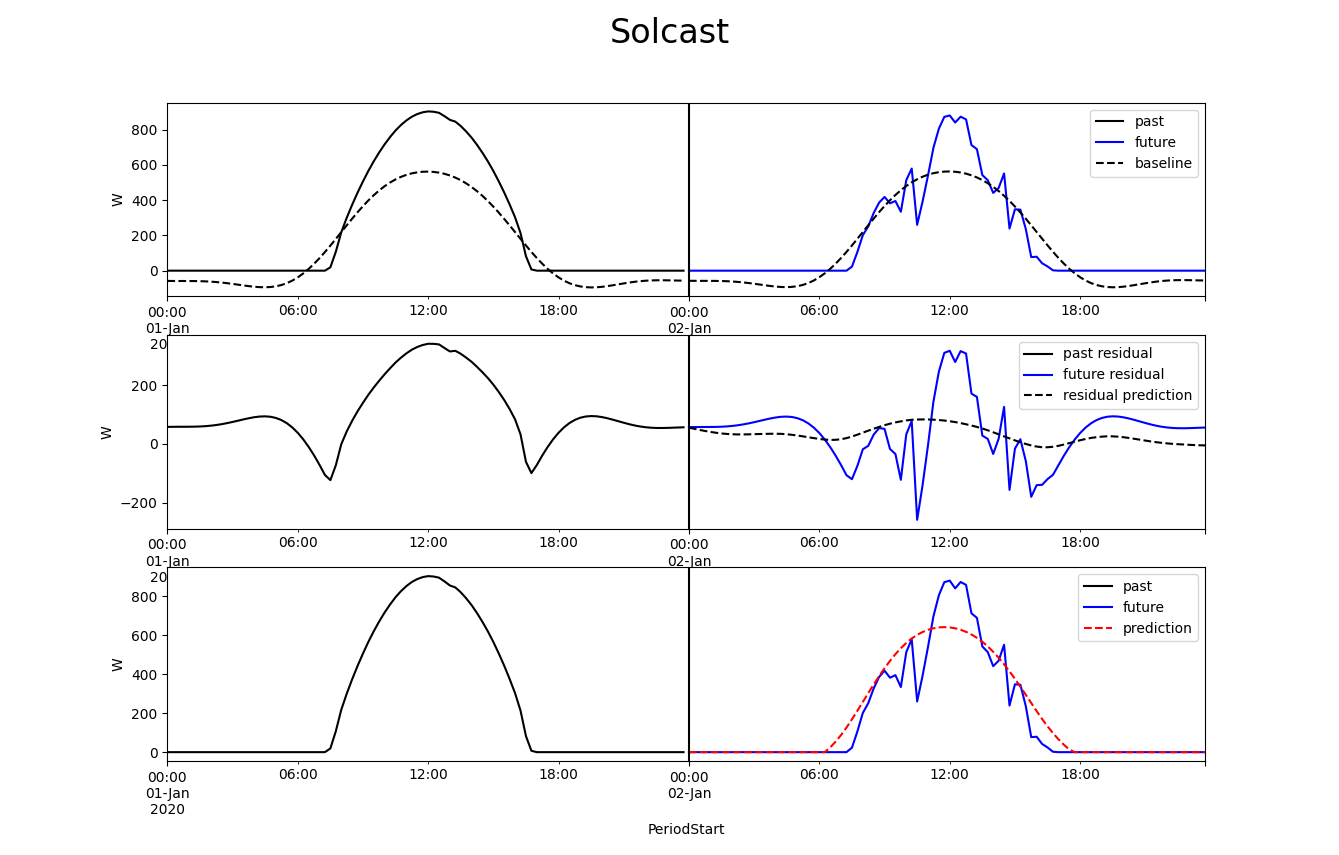

The predictions aren't perfect, but it should be functional for the sake of getting a minimum viable product done. I went ahead and decided to move on to the next step. 

#### Design of Simulation Environment 

In order to run MPC, I needed to create a simulation environment for the microgrid that the MPC algorithm could run on. To do this, I created a software model of the microgrid using object-oriented programming. I created 5 classes that in tandem represent the entities of the microgrid that store its various properties, simulate real world conditions and operations, and
implement the actions calculated by our MPC algorithm. As shown below, these objects are the Battery, PV, Load, User, and Grid classes. Only the main attributes and methods of each class are displayed, and are not an exact/exhaustive list. 

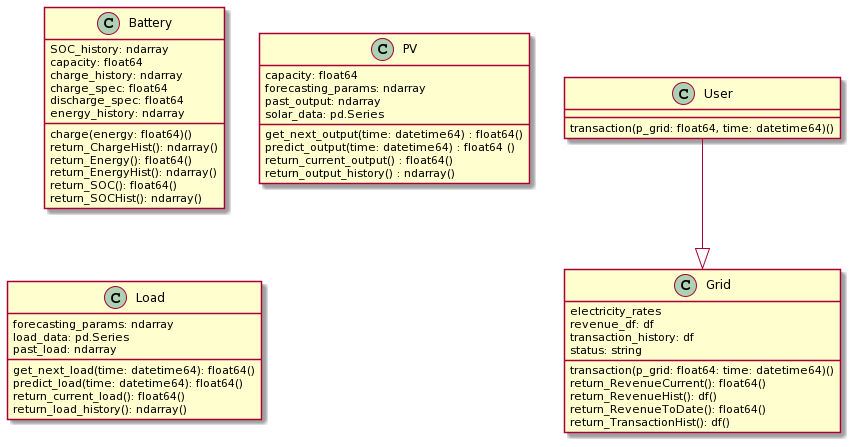

Both the Load and PV class each contain their respective ML models for predictions as a function of time. They also store the actual 2020 validation data for PV generation output and load profiles, so that each timestep within the simulation, the microgrid is "fed" real-time data as the algorithm progresses. Both the Battery, Grid, and User objects implement the actions outputted by the algorithm, which is the amount to charge/discharge the battery ($p_{batt}$) and amount to sell/buy from the grid ($p_{grid}$) at each timestep. 

The Battery class keeps track of the its current energy level and SOC, in addition to it's past actions. The User and Grid class keeps track of transactions with each other from their respective POV's at each timestep, as well as their revenues. The net cost of the microgrid is the Grid's revenue (what we pay) - User's revenue (what we make). 

#### Setup 
Like last time, the microgrid was simulated using ERCOT load data and Solcast PV generation data in 15 minute intervals from 1-1-2020T11:45 PM to 11-30-2020T11:30 PM. A 96-step (24 hours) look-behind window is used for 96-step look-ahead forecasting. For each The MPC algorithm is integrated with the microgrid using the following pseudocode:

For each *timestep* in *simulation_time*: 

1. Get current load and PV output. 
2. Forecast day-ahead load and PV output. 
3. Calculate optimal action, given current state and forecast.
4. Execute optimal action on microgrid:
    - Charge/Discharge Battery 
    - Buy/Sell Energy between User and Grid
5. Update environment for next step. 
    - Get next "real" load. 
    - Get next "real" PV output.


## *Results*

It turns out that MPC worked quite well for this system, achieving an optimal objective value (net cost) of **$598.42**. This is only a 0.3% difference from the prescient optimization objective value! In other words, the MPC algorithm achieved a very close result to the optimal upper bound. 

|    Scenario  | Optimal Electricity Cost to User |
| :-----------: | :-----------: |
| w/o Microgrid     |  \$ 3057.50 |
| w/ Microgrid (Prescient Optimization)     |   \$ 596.64    |
| **w/ Microgrid (MPC Optimization)**     |   **\$ 598.42**    |


The small $1.78 difference is essentially the "cost" of not knowing the solar output and load profile ahead of time, which in this case doesn't seem to be a big deal for the MPC algorithm. 

Let's take a more in-depth look between the MPC algorithm actions and the Prescient Optimization actions. The figure shows what the MPC algorithm and baseline optimization chooses to do for a three-day period in the winter:

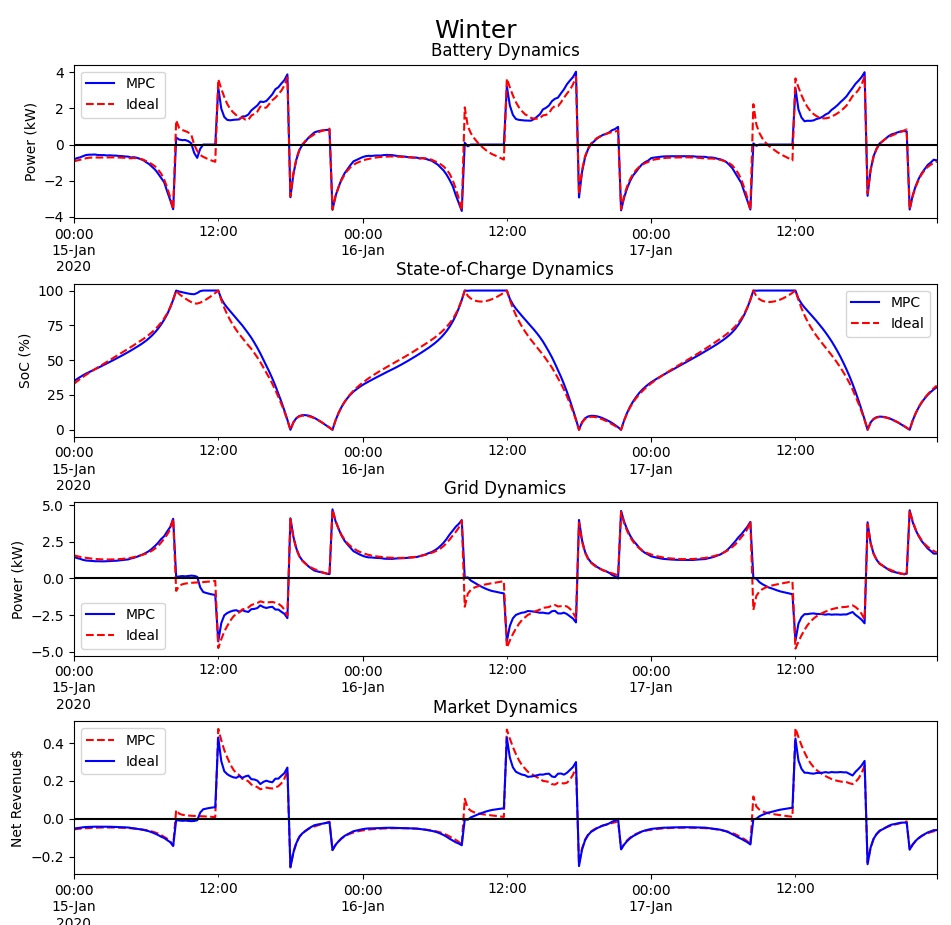

The actions of the MPC algorithm generally follows the same shape of the baseline optimization actions, sometimes even replicating them exactly. The ideal and the MPC \\( p^{batt} \\) (Battery Dynamics), state-of-charge, and \\( p^{grid} \\) (Grid Dynamics) differ slightly in the period between 8:30 AM and 12 PM. This corresponds to the sudden shift in the electricity rate, which goes to partial peak levels during that time. We also see from the Market Dynamics graph that the microgrid makes positive revenue between 12 PM and 5:45 PM, which correponds to when the battery is discharging, and also when electricity rates happen to be the most expensive. The battery charges at night when the electricity rates are lower.

The figure below shows the same set of graphs, but for a three-day period in the summertime:

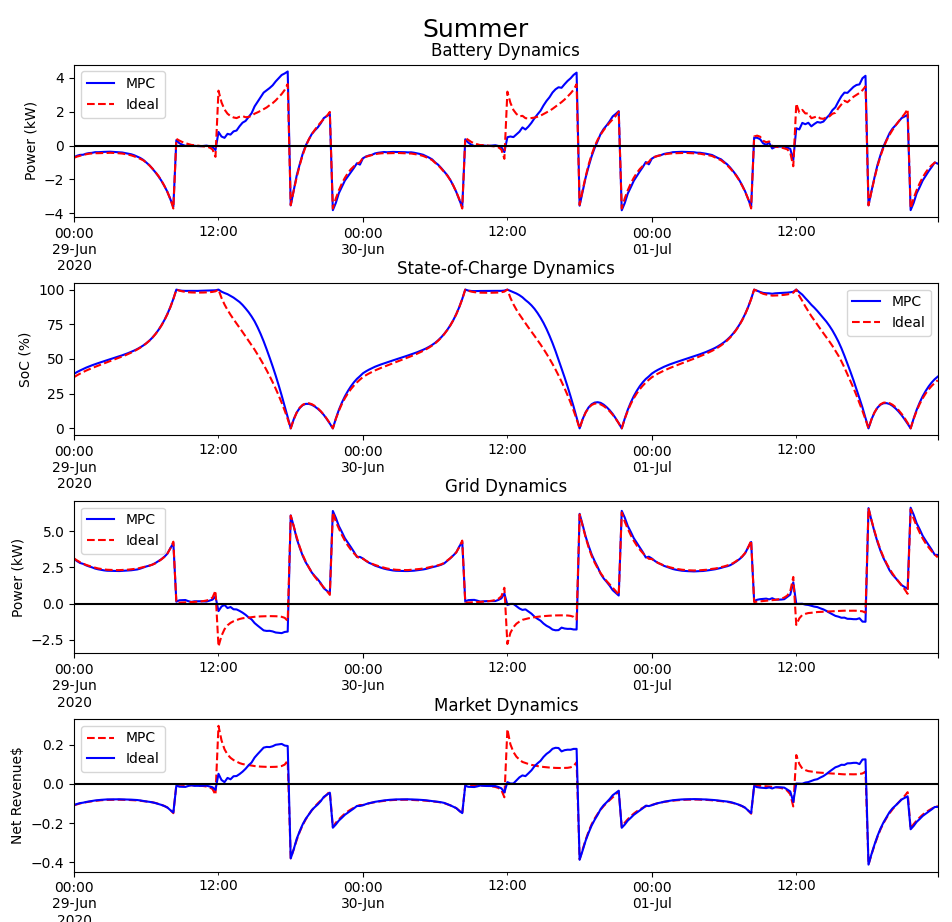

In the summertime, there are two big differences from the winter: 1) we lose a lot more money, shown by the predominantly negative values in the Market Dynamics curve, and 2) the MPC algorithm actions differ in the baseline optimization actions in the time period 12 PM to 6 PM. 

The first point can be explained by the fact that the microgrid has a higher load in the summer time, likely due to higher use of AC. As expected, the microgrid still makes its money by selling energy to the grid between 12 PM and 6 PM, when electricity usage and rates are higher. 

The second point is possibly a result of the sudden increase in load between 12 PM to 6 PM, which the prescient algorithm can take into account when it does its optimization. The MPC algorithm, however, does not have the perfect foresight for this, and thus it's actions "lag" behind the truly optimal actions. As evidenced by the final objective values for both cases, however, this does not significantly impact the net costs, and it turns out the MPC algorithm performs almost as well as the ideal solution anyways.

### Extra: Sensitivity Analysis

For the above results, we assumed a microgrid system with a 13.5 kWh battery and a 2.5 kW solar panel, and we paid close to $600 for our electricity. How would our electricity costs change for different sizes of the battery and solar panel system? This is known as a sensitivity analysis, and I performed one for the baseline optimization formulation described above. 

I swept the battery size from 0 kWh (no battery) to 25 kWh in 2.5 kWh increments and the PV size from 0 kW (no solar panel) to 10 kW in 1 kW increments. For each case, I ran the baseline optimization to calculation the optimal costs, and plotted them on a 10 by 10 grid. 

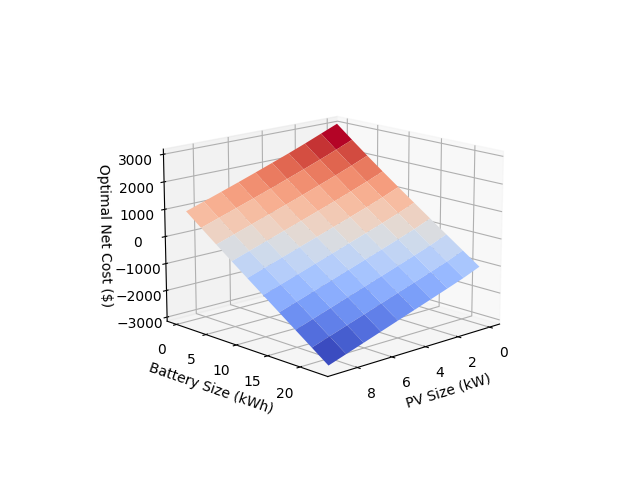

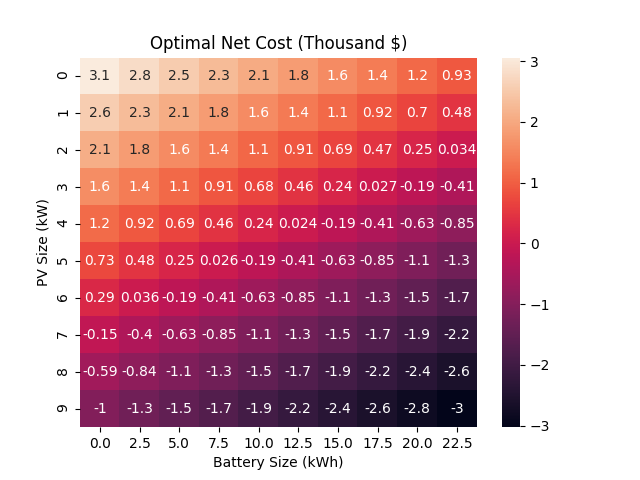

The plots above yield some interesting insights: the optimal value can be seen as a linear function of the battery size and PV size. Additionally, we see that the optimal value is more sensitive to the battery size than the PV size; this is given by the partial derivatives of the graph. 

***
$$\frac{\partial Optimal Net Cost}{\partial Battery Size} \approx -80 ($/kWh)$$

$$\frac{\partial Optimal Net Cost}{\partial PV Size} \approx -400 ($/kW)$$
***

The calculations above show that you can get reduce your electricity costs much more by adding an additional kW of PV capacity than adding an addition kWh of battery storage. 

# What's Next 

In conclusion, the MPC controller did an awesome job calculating the optimal microgrid actions, achieving only a **0.3%** difference from the theoretical maximum optimal objective value! With that being said, there is still I can do, and will do, for future work. Here is a list of the next steps I plan on tackling, divided into three categories:

1. **Increasing Accessibility**:
    - How could this MPC algorithm interact with the user in real life? Create a user-friendly dashboard that visualizes the model inputs and outputs at every timestep, clearly showing how the MPC algorithm works. The dashboard would have an easy-to-use UI that presents analytics such as: current revenue, current energy usage, current PV output, day-ahead load & PV forecasts, what microgrid elements are generating energy, etc. 
    
2. **Increasing Complexity**: 
    - Assume a microgrid in a wholesale electricity market in which rates are not predetermined and must be forecasted, adding an additional degree of uncertainty.
    - Incorporate an additional EV element to the microgrid that is able to dispatch energy and charge based on charging profiles of real-life EV user data. Quantify the benefits of EV charging/discharging. 
    
3. **Increasing Knowledge**:
    - Run sensitivity experiments for the MPC controller just to see how it lines up with the baseline optimization.  
    - Experiment with different electricity pricing structures (PG&E has different plans). 
    - The least squares plus autoregressive residuals regression ended up working fine for the MPC model in terms of optimizing revenue, but there were still clearly large errors in the forecasts. Experiment with different ML time-series models, such as LSTM's and RNN's for improving forecasting accuracy. 


